In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)

from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [5]:
data = pd.read_csv(r'C:\Users\roshn\Documents\GitHub\interns_task\taskdata.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

account_id has 7 missing values in the first look. The dataset shape is (4407, 17).

In [7]:
data.describe()

user_id   account_id  max_return_days  average_return_days  \
count  4.407000e+03  4400.000000      4407.000000          4407.000000   
mean   4.106655e+09   506.553864        22.335602             7.171576   
std    6.794948e+09   326.072756        43.591246            19.209092   
min    4.100390e+05   111.000000         1.000000             0.500000   
25%    6.184510e+08   226.000000         1.000000             1.000000   
50%    7.296626e+08   493.000000         2.000000             1.076923   
75%    7.292936e+09  1005.000000        30.000000             5.666667   
max    7.356031e+10  1017.000000       354.000000           354.000000   

       customer_since_months  total_revenue  average_revenue  avg_vas_count  \
count            4407.000000    4407.000000      4407.000000    4407.000000   
mean                9.874064     194.130365        16.942615       3.249388   
std                 5.169639    1548.361547       128.268824       5.509869   
min                 1.000000       0.000000         0.000000       0.000000   
25%                 5.000000       0.000000         0.000000       0.142857   
50%                12.000000       0.000000         0.000000       2.000000   
75%                14.000000       0.000000         0.000000       4.333333   
max                24.000000   43957.172700      3852.727273     156.583333   

       avg_used_vas_value  business_type  avg_wallet_bonus  avg_active_ads  \
count         4407.000000    4407.000000       4407.000000     4407.000000   
mean            72.119006       0.497844        338.851046       98.922260   
std            117.019515       1.199725        831.746150      297.692950   
min              0.000000       0.000000          0.000000        0.000000   
25%              2.727273       0.000000          0.000000       13.500000   
50%             45.000000       0.000000         40.000000       40.000000   
75%            100.000000       0.000000        327.280000      101.291667   
max           3357.500000       5.000000      15606.500000     9183.866667   

       avg_new_ads  avg_email_replies  avg_call_replies  avg_sms_replies  \
count  4407.000000        4407.000000       4407.000000      4407.000000   
mean     16.812003          25.681004         27.622151         0.162009   
std      68.045904          55.324218         61.069006         0.517693   
min       0.000000           0.000000          0.000000         0.000000   
25%       2.500000           4.461538          4.384615         0.000000   
50%       6.333333          12.266667         12.933333         0.000000   
75%      14.250000          28.000000         30.784615         0.153846   
max    2606.000000        1716.400000       1743.266667        14.636364   

            target  
count  4407.000000  
mean      0.103245  
std       0.304313  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [8]:
data.head(10)

user_id  account_id  max_return_days  average_return_days  \
0   410039       496.0                8             1.500000   
1   410240       499.0               37             8.200000   
2   411764       493.0                9             1.533333   
3   411985       262.0                1             1.000000   
4   412071       496.0                1             1.000000   
5   412391       113.0                1             1.000000   
6   412662      1005.0               21             4.636364   
7   457000       262.0               29             3.250000   
8   490356      1005.0                3             1.400000   
9   491551      1017.0                1             1.000000   

   customer_since_months  total_revenue  average_revenue  avg_vas_count  \
0                     14            0.0              0.0       3.666667   
1                     10            0.0              0.0       4.900000   
2                     15            0.0              0.0       5.333333   
3                     14            0.0              0.0       6.307692   
4                     18            0.0              0.0       5.846154   
5                     14            0.0              0.0      12.692308   
6                     11            0.0              0.0       1.000000   
7                     16            0.0              0.0       3.250000   
8                      5            0.0              0.0       0.000000   
9                      2            0.0              0.0       0.000000   

   avg_used_vas_value  business_type  avg_wallet_bonus  avg_active_ads  \
0           66.666667              0            300.00       79.333333   
1          114.000000              0              0.00      232.100000   
2          106.666667              0            150.00       55.083333   
3          176.153846              0           1481.00      409.538462   
4          109.230769              0             41.50       48.230769   
5          380.769231              0            350.00      799.153846   
6           26.363636              0              0.00      119.727273   
7           68.750000              3             63.07       26.937500   
8            0.000000              5              0.00        2.500000   
9            0.000000              0              0.00       74.500000   

   avg_new_ads  avg_email_replies  avg_call_replies  avg_sms_replies  target  
0    15.250000          32.416667         27.916667         0.250000       0  
1    18.300000          16.200000         13.800000         0.000000       0  
2     3.750000          20.250000         24.500000         0.000000       0  
3    80.769231          87.461538         57.615385         0.000000       1  
4     1.692308          17.461538         25.769231         0.230769       0  
5   115.153846         166.307692        160.769231         0.153846       0  
6    12.454545          46.000000         57.272727         0.181818       0  
7     3.250000          18.625000         17.062500         0.062500       0  
8     0.500000           1.000000          1.750000         0.000000       1  
9    10.500000           4.500000          9.500000         0.000000       1

I wonder why is the average and total revenue 0 for even the 75th percentile of total users.

In [9]:
data.user_id.nunique()

4407

So each data point corresponds to one single user. This column is not of importance to us. 

In [10]:
data.drop('user_id',axis=1,inplace=True)

In [11]:
data.account_id.value_counts()

1005.0    684
493.0     483
499.0     467
496.0     467
262.0     438
1017.0    436
113.0     290
226.0     275
111.0     248
112.0     148
364.0     134
517.0     112
202.0     111
115.0      73
116.0      34
Name: account_id, dtype: int64

In [12]:
data[data.account_id.isnull()]

account_id  max_return_days  average_return_days  customer_since_months  \
764          NaN                2             1.066667                     15   
1002         NaN               31            31.000000                      1   
2276         NaN                1             1.000000                      1   
3792         NaN                1             1.000000                      1   
3967         NaN                1             1.000000                      1   
4148         NaN                1             1.000000                      2   
4259         NaN                1             1.000000                      2   

      total_revenue  average_revenue  avg_vas_count  avg_used_vas_value  \
764             0.0              0.0            3.1                73.0   
1002            0.0              0.0            0.0                 0.0   
2276            0.0              0.0            0.0                 0.0   
3792            0.0              0.0            0.0                 0.0   
3967            0.0              0.0            0.0                 0.0   
4148            0.0              0.0            0.0                 0.0   
4259            0.0              0.0            0.0                 0.0   

      business_type  avg_wallet_bonus  avg_active_ads  avg_new_ads  \
764               0             400.0            82.4         13.0   
1002              0               0.0           288.0        288.0   
2276              4               0.0             0.0          0.0   
3792              0               0.0             0.0          0.0   
3967              4               0.0             0.0          0.0   
4148              0               0.0             4.5          3.0   
4259              1               0.0             7.0          3.5   

      avg_email_replies  avg_call_replies  avg_sms_replies  target  
764                11.0              11.5              0.0       0  
1002               33.0              32.0              0.0       0  
2276                0.0               0.0              0.0       0  
3792                0.0               0.0              0.0       0  
3967                0.0               0.0              0.0       0  
4148                2.0               1.0              0.0       1  
4259                1.5               1.5              0.0       0

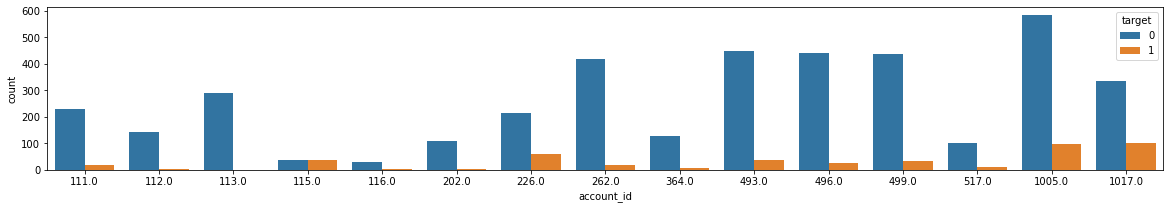

In [13]:
_ = sns.countplot(x=data.account_id, hue = data.target,data=data)
_ = plt.show()

Interestingly, the mode(i.e.1005) of account_id has the same ratio split of 0 and 1 as our missing values(6:1)

In [14]:
data.account_id.fillna(value=data.account_id.mode()[0],inplace=True)

# Exploratory Data Analysis

In [15]:
data.target.value_counts()

0    3952
1     455
Name: target, dtype: int64

The dataset is highly unbalanced. Looking at the distributions of other variables to detect and remove outliers.

In [16]:
cols = [i for i in data.columns if i not in ['account_id','business_type','target']]


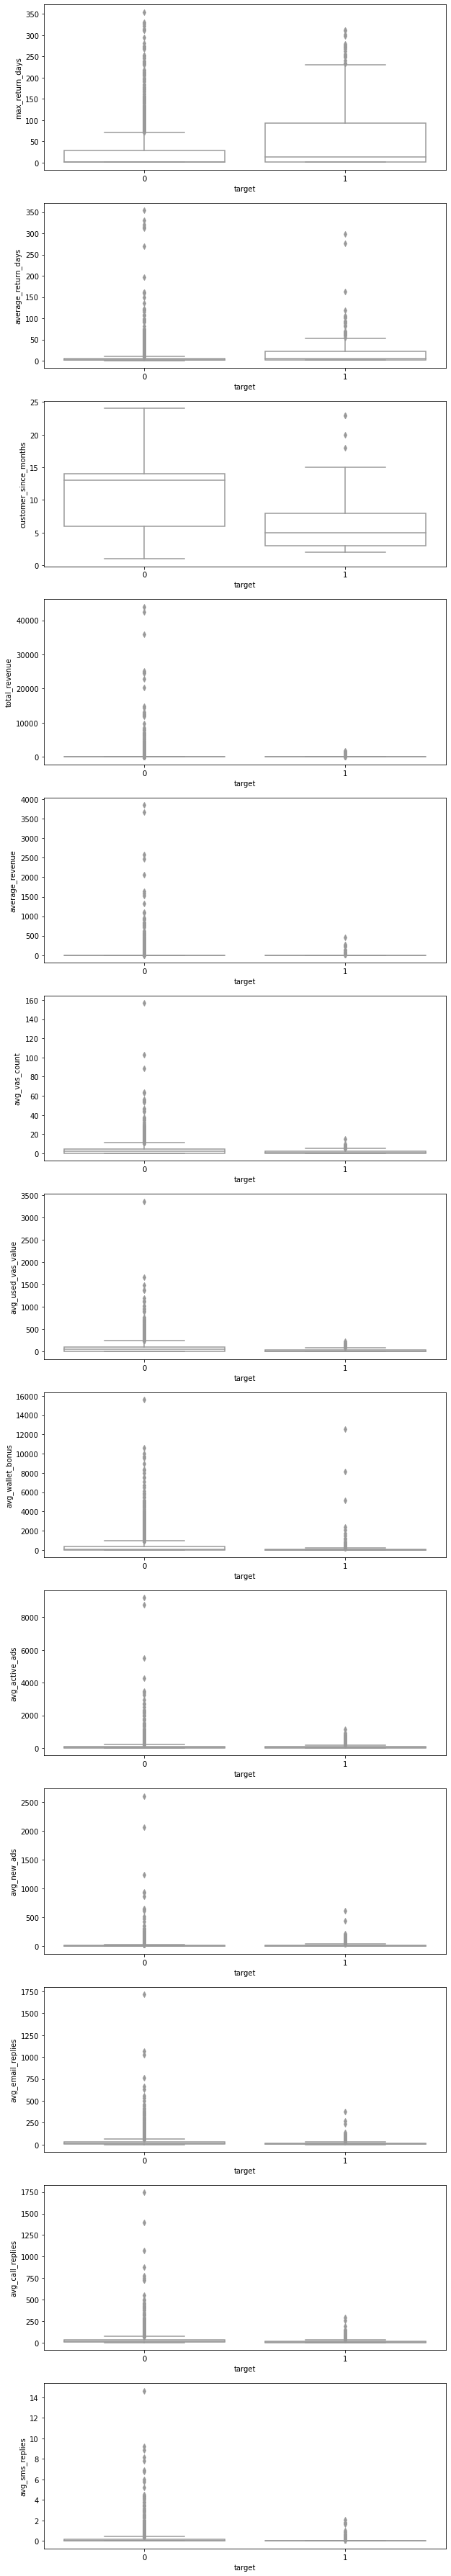

In [17]:
fig,ax = plt.subplots(len(cols),1, figsize=(10,65))

for i,col in enumerate(cols):
    sns.boxplot('target',col,ax=ax[i],color='white',data=data)

Removing only the max values that are highly deviated from the mean. 

In [18]:
data = data[data['avg_sms_replies']<10]
data = data[data['avg_call_replies']<1000]
data = data[data['avg_email_replies']<1000]
data = data[data['avg_new_ads']<1000]
data = data[data['avg_active_ads']<4000]
data = data[data['avg_wallet_bonus']<12000]
data = data[data['avg_used_vas_value']<2000]
data = data[data['avg_vas_count']<80]
data = data[data['average_revenue']<3000]
data = data[data['total_revenue']<30000]

In [19]:
data.shape

(4391, 16)

Most of this dataset has main value and average value. They could have a very high collinearity. If that is true, we might want to keep only the average for better comparison.

In [20]:
data_X = data.drop('target',axis=1)


In [21]:
def check_VIF(dataset):
    col_VIF = pd.DataFrame(dataset.columns)
    col_VIF['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    print(col_VIF)

In [22]:
check_VIF(data_X)

                        0        VIF
0              account_id   2.465486
1         max_return_days   3.029072
2     average_return_days   2.659829
3   customer_since_months   3.878749
4           total_revenue   5.753745
5         average_revenue   5.393996
6           avg_vas_count  22.741738
7      avg_used_vas_value  24.443537
8           business_type   1.140119
9        avg_wallet_bonus   1.597994
10         avg_active_ads   3.892777
11            avg_new_ads   2.530942
12      avg_email_replies  10.594199
13       avg_call_replies  13.867064
14        avg_sms_replies   3.058529


So looks like we should consider variables 'avg_vas_count','avg_used_vas_value', 'avg_email_replies', 'avg_call_replies' and compare them visually to better understand their relationship-

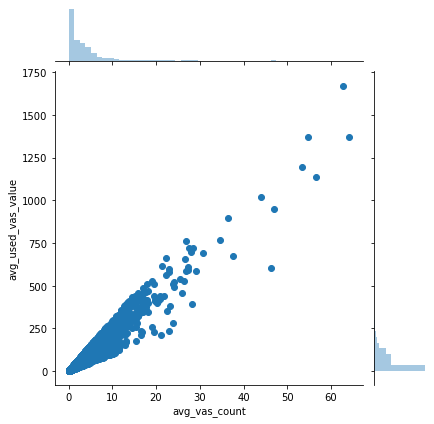

In [23]:
sns.jointplot(x = data['avg_vas_count'], y = data['avg_used_vas_value'], kind='scatter')

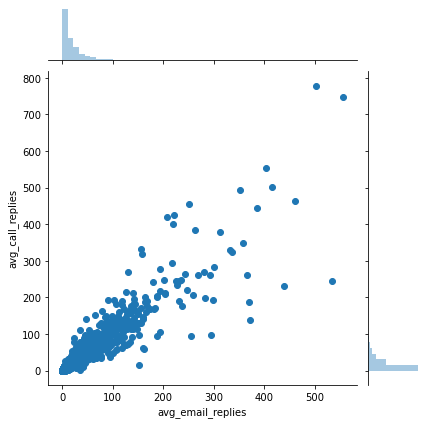

In [24]:
sns.jointplot(x = data['avg_email_replies'], y = data['avg_call_replies'], kind='scatter')

These 4 variables are clearly very collinear. Removing the ones with higher values of VIF and checking again. 

In [25]:
data_X = data_X.drop(['avg_used_vas_value','avg_call_replies'],axis=1)

In [26]:
check_VIF(data_X)

                        0       VIF
0              account_id  2.459731
1         max_return_days  3.024048
2     average_return_days  2.658210
3   customer_since_months  3.770316
4           total_revenue  5.637961
5         average_revenue  5.393726
6           avg_vas_count  2.987832
7           business_type  1.138349
8        avg_wallet_bonus  1.597014
9          avg_active_ads  3.836500
10            avg_new_ads  2.522144
11      avg_email_replies  3.608327
12        avg_sms_replies  2.100020


Looks like total_revenue and average_revenue have some multicollinearity.

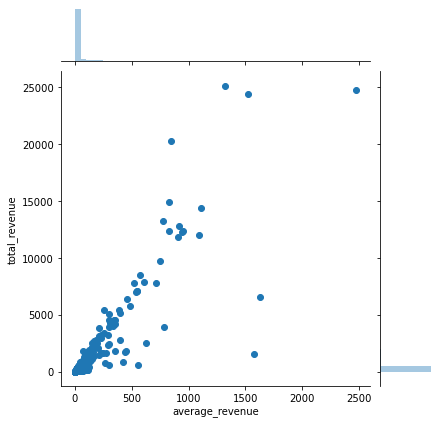

In [27]:
sns.jointplot(x = data_X['average_revenue'], y = data_X['total_revenue'], kind='scatter')

Lets keep just the average_revenue

In [28]:
data_X = data_X.drop('average_revenue',axis=1)

In [29]:
check_VIF(data_X)

                        0       VIF
0              account_id  2.459423
1         max_return_days  3.009305
2     average_return_days  2.655540
3   customer_since_months  3.764969
4           total_revenue  1.424224
5           avg_vas_count  2.983879
6           business_type  1.132996
7        avg_wallet_bonus  1.596554
8          avg_active_ads  3.833298
9             avg_new_ads  2.521490
10      avg_email_replies  3.608252
11        avg_sms_replies  2.099713


Creating the dependent variable

In [30]:
data_Y = data['target']

In [31]:
final_data = pd.concat([data[data_X.columns],data_Y],axis=1)

In [32]:
final_data.head()

account_id  max_return_days  average_return_days  customer_since_months  \
0       496.0                8             1.500000                     14   
1       499.0               37             8.200000                     10   
2       493.0                9             1.533333                     15   
3       262.0                1             1.000000                     14   
4       496.0                1             1.000000                     18   

   total_revenue  avg_vas_count  business_type  avg_wallet_bonus  \
0            0.0       3.666667              0             300.0   
1            0.0       4.900000              0               0.0   
2            0.0       5.333333              0             150.0   
3            0.0       6.307692              0            1481.0   
4            0.0       5.846154              0              41.5   

   avg_active_ads  avg_new_ads  avg_email_replies  avg_sms_replies  target  
0       79.333333    15.250000          32.416667         0.250000       0  
1      232.100000    18.300000          16.200000         0.000000       0  
2       55.083333     3.750000          20.250000         0.000000       0  
3      409.538462    80.769231          87.461538         0.000000       1  
4       48.230769     1.692308          17.461538         0.230769       0

Now we are ready to model. So lets get to it.

# Model 

The dataset here is highly imbalanced so we would have to upsample it to make it more balanced and increase the dataset size a little. But on the upside, we have more numeric values and very few categorical ones('account_id' and 'business_type'). The target variable is a binary one. So we can start with a logistic regression. The dataset size is quite small for a DNN, but we can fit a Random Forest and XGB here. In the end, we can make a comparison of which model predicts the test data better and decide to either finetune it or keep it. 

Upsampling first

In [33]:
data_0 = final_data[final_data.target==0]
data_1 = final_data[final_data.target==1]
print(final_data.target.value_counts())

0    3937
1     454
Name: target, dtype: int64


In [34]:
data_upsample_1 = resample(data_1,replace=True,n_samples=3937,random_state=42)

In [35]:
upsampled_dataset = pd.concat([data_0,data_upsample_1])

In [36]:
upsampled_dataset.target.value_counts()

1    3937
0    3937
Name: target, dtype: int64

Lets convert the categorical values to dummies 

In [37]:
upsampled_dataset = pd.get_dummies(upsampled_dataset,columns=['account_id','business_type'])

In [38]:
upsampled_dataset.head()

max_return_days  average_return_days  customer_since_months  total_revenue  \
0                8             1.500000                     14            0.0   
1               37             8.200000                     10            0.0   
2                9             1.533333                     15            0.0   
4                1             1.000000                     18            0.0   
5                1             1.000000                     14            0.0   

   avg_vas_count  avg_wallet_bonus  avg_active_ads  avg_new_ads  \
0       3.666667             300.0       79.333333    15.250000   
1       4.900000               0.0      232.100000    18.300000   
2       5.333333             150.0       55.083333     3.750000   
4       5.846154              41.5       48.230769     1.692308   
5      12.692308             350.0      799.153846   115.153846   

   avg_email_replies  avg_sms_replies  ...  account_id_499.0  \
0          32.416667         0.250000  ...                 0   
1          16.200000         0.000000  ...                 1   
2          20.250000         0.000000  ...                 0   
4          17.461538         0.230769  ...                 0   
5         166.307692         0.153846  ...                 0   

   account_id_517.0  account_id_1005.0  account_id_1017.0  business_type_0  \
0                 0                  0                  0                1   
1                 0                  0                  0                1   
2                 0                  0                  0                1   
4                 0                  0                  0                1   
5                 0                  0                  0                1   

   business_type_1  business_type_2  business_type_3  business_type_4  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
4                0                0                0                0   
5                0                0                0                0   

   business_type_5  
0                0  
1                0  
2                0  
4                0  
5                0  

[5 rows x 32 columns]

In [39]:
upsampled_dataset.drop(['business_type_0','account_id_1017.0'],axis=1,inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler
scaled_sample = StandardScaler().fit_transform(upsampled_dataset.iloc[:,:-1])

C:\Users\roshn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\roshn\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Now we can split the data to train and test.

In [42]:
train_X,test_X,train_Y,test_Y = train_test_split(scaled_sample,upsampled_dataset.iloc[:,-1],
                                                 test_size = 0.2, random_state = 42)

Trying out different models starting with Logistic Regression

In [64]:
logreg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [ 0.1, 0.01, 0.001,0.0001]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_lr = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_lr = grid_search_lr.fit(train_X, train_Y)

# summarize results
print("Best: %f using %s" % (grid_result_lr.best_score_, grid_result_lr.best_params_))
means = grid_result_lr.cv_results_['mean_test_score']
stds = grid_result_lr.cv_results_['std_test_score']
params = grid_result_lr.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.965550 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.965285 (0.000953) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.965285 (0.000953) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.965338 (0.000898) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.965550 (0.000696) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.965550 (0.000696) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.965391 (0.000611) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.965550 (0.000696) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.965550 (0.000696) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.965550 (0.000696) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.965550 (0.000696) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.965550 (0.000696) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.965550 (0.000696) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}


So Logistic Regression gives us 96% train accuracy using 'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'

How about RandomForest then? Lets see.

In [63]:
ranfor = RandomForestClassifier()
n_estimators = [10, 100, 1000, 10000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_rf = GridSearchCV(estimator=ranfor, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_rf = grid_search_rf.fit(train_X, train_Y)

# summarize results
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))
means = grid_result_rf.cv_results_['mean_test_score']
stds = grid_result_rf.cv_results_['std_test_score']
params = grid_result_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982272 using {'max_features': 'sqrt', 'n_estimators': 10000}
0.981267 (0.002731) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.982219 (0.003158) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.982166 (0.003219) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.982272 (0.003097) with: {'max_features': 'sqrt', 'n_estimators': 10000}
0.981108 (0.003533) with: {'max_features': 'log2', 'n_estimators': 10}
0.981796 (0.002977) with: {'max_features': 'log2', 'n_estimators': 100}
0.982008 (0.003049) with: {'max_features': 'log2', 'n_estimators': 1000}
0.982166 (0.003140) with: {'max_features': 'log2', 'n_estimators': 10000}


Random Forest does perform much better here.

We can now compare the performance of XGB.

In [60]:
xgb = XGBClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 5, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_xgb = grid_search_xgb.fit(train_X, train_Y)

# summarize results
print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))
means = grid_result_xgb.cv_results_['mean_test_score']
stds = grid_result_xgb.cv_results_['std_test_score']
params = grid_result_xgb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.981637 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}
0.966503 (0.001541) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.966291 (0.001511) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.965285 (0.002232) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.966556 (0.001290) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.966556 (0.001211) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.964862 (0.001945) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.966873 (0.001267) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.967085 (0.001525) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.965762 (0.001559) with: {'learning_rate': 0.001, 'ma

In [65]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve

def get_metrics(y_test,y_pred):
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('AUC ROC score : ',roc_auc_score(y_test,y_pred))
    print('Classification Matrix : ',classification_report(y_test,y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_test,y_pred))
    plot_auc_roc(y_test,y_pred)
 
def plot_auc_roc(y_test,y_pred):
    fpr, tpr,thres = roc_curve(y_test , y_pred)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], '--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('AUC-ROC curve')
    plt.legend()

testing out the metrics on the test set

C:\Users\roshn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
No handles with labels found to put in legend.


Metrics for Logistic Regression :
Accuracy Score:  0.9523809523809523
AUC ROC score :  0.5
Classification Matrix :                precision    recall  f1-score   support

           0       0.95      1.00      0.98      1500
           1       0.00      0.00      0.00        75

   micro avg       0.95      0.95      0.95      1575
   macro avg       0.48      0.50      0.49      1575
weighted avg       0.91      0.95      0.93      1575

Confusion Matrix:  [[1500    0]
 [  75    0]]


No handles with labels found to put in legend.


Metrics for Random Forest :
Accuracy Score:  0.9796825396825397
AUC ROC score :  0.7866666666666666
Classification Matrix :                precision    recall  f1-score   support

           0       0.98      1.00      0.99      1500
           1       1.00      0.57      0.73        75

   micro avg       0.98      0.98      0.98      1575
   macro avg       0.99      0.79      0.86      1575
weighted avg       0.98      0.98      0.98      1575

Confusion Matrix:  [[1500    0]
 [  32   43]]


No handles with labels found to put in legend.


Metrics for XGB :
Accuracy Score:  0.9771428571428571
AUC ROC score :  0.779
Classification Matrix :                precision    recall  f1-score   support

           0       0.98      1.00      0.99      1500
           1       0.93      0.56      0.70        75

   micro avg       0.98      0.98      0.98      1575
   macro avg       0.96      0.78      0.84      1575
weighted avg       0.98      0.98      0.97      1575

Confusion Matrix:  [[1497    3]
 [  33   42]]


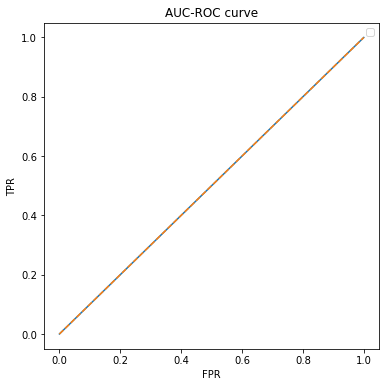

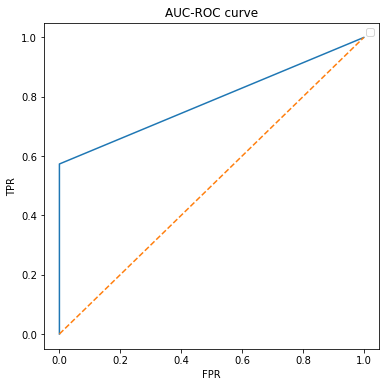

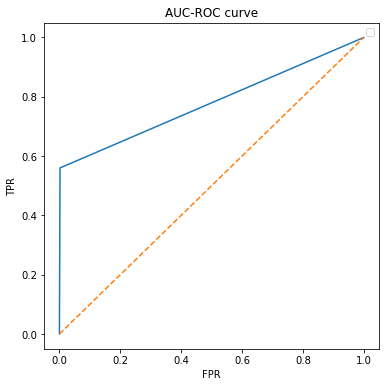

In [67]:
lr = LogisticRegression(**grid_result_lr.best_params_)
y_pred_lr = lr.fit(train_X,train_Y).predict(test_X)
print("Metrics for Logistic Regression :")
get_metrics(test_Y,y_pred_lr)

rf = RandomForestClassifier(**grid_result_rf.best_params_)
y_pred_rf = rf.fit(train_X,train_Y).predict(test_X)
print("Metrics for Random Forest :")
get_metrics(test_Y,y_pred_rf)


xgb = XGBClassifier(**grid_result_xgb.best_params_)
y_pred_xgb = xgb.fit(train_X,train_Y).predict(test_X)
print("Metrics for XGB :")
get_metrics(test_Y,y_pred_xgb)

Here we can conclude that Random Forest performs the best and should be used as the final model

# SHAP and feature importances

In [71]:
import shap

In [74]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(train_X)

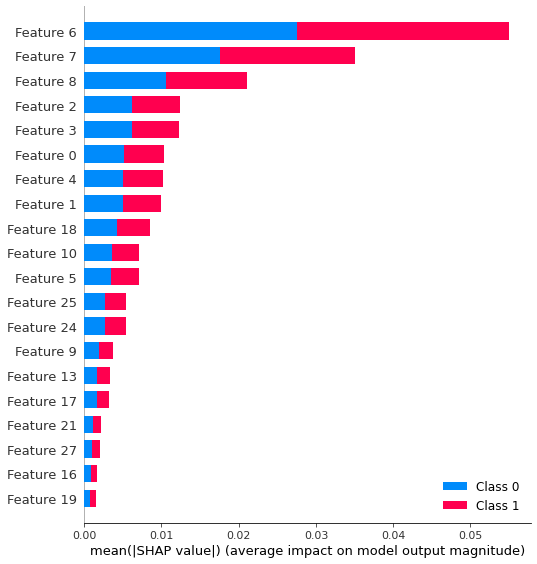

In [75]:
shap.summary_plot(shap_values, train_X)

([<matplotlib.axis.XTick at 0x24a226f8860>,
 <a list of 29 Text major ticklabel objects>)

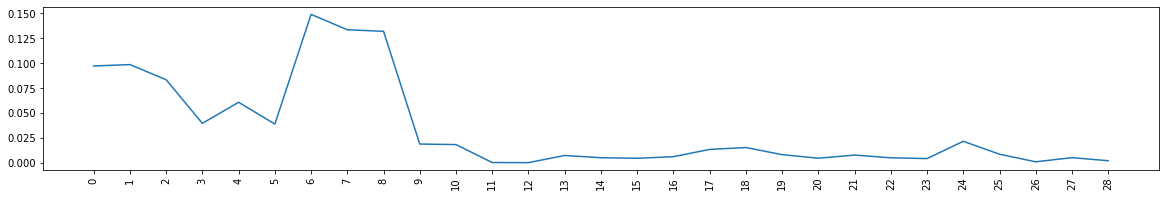

In [81]:
import numpy as np
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(train_X.shape[1]), rotation=90)

SHAP and random forest feature importance match here as expected. 